# Transit Timing Variations (TTVs)

Figure 5.8 from Chapter 5 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Plots of Transit timing variations for exoplanets Kepler-419b ($\mathcal{P} = 69.7546$d) from
Dawson et al. [2014, ApJ, 791, 89 (Figure 1)](https://ui.adsabs.harvard.edu/abs/2014ApJ...791...89D) and
Kepler-88b (KOI-142.01, $\mathcal{P} = 10.916$d) from Holczer et al. 
[2016, ApJS, 225, 9](https://ui.adsabs.harvard.edu/abs/2016ApJS..225....9H), using an electronic table from
the VizeiR database provided by Tomer Holczer and edited into ASCII format for our purposes here.

We are grateful to the authors of both papers for providing us with their original data.

In [7]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [8]:
plotFile = 'Fig5_8.png' 

# graphic aspect ratio = width/height

aspect = 2.5

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 3
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data

TTV data for the two stars

### Kepler-419b: Dawson et al. 2014

Provided by Dr. Dawson, modified format for use here.  Data are 4-column ASCII as follows:
 * `Time` - time in days
 * `O-C` - observed-computed in hours (actual - expected transit)
 * `errHi` - upper error bar on O-C in hours
 * `errLo` - lower error bar on O-C in hours
 
We convert `Time` into transit number using period P=69.7546d from Dawson et al. 2014.
  
### Kepler-88b (KOI-142.01): Holczer et al. 2016

Data derived from a VizieR table from Holczer et al. 2016 edited into ASCII 4-column format
for use here. Data are as follows:
 * `N` - transit number
 * `tn` - expected mid-transit time in BJD days
 * `O-C` - observed-expected mid-transit time in minutes
 * `e_O-C` - error on `O-C`
 
We convert O-C and error to hours to match the presentation for Kepler-419b

In [9]:
# Kepler-419b

ttvFile = f'TTVs/Kepler-419b.txt'

P_K419b = 69.7546 # days

data = pd.read_csv(ttvFile,sep=r'\s+',comment='#')

t0_K419b = np.array(data['Time'])
OmC_K419b = np.array(data['O-C'])
eHi_K419b = np.array(data['errHi'])
eLo_K419b = np.array(data['errLo'])

tNum_K419b = 1.0 + (t0_K419b - t0_K419b[0])/P_K419b # convert to transit number

ntMin_K419b = 0.0
ntMax_K419b = 2.0 + int(tNum_K419b[-1])

yMin_K419b = -3.0 # hours
yMax_K419b = 3.0

# Kepler-88b

ttvFile = f'TTVs/Kepler-88b.txt'

data = pd.read_csv(ttvFile,sep=r'\s+',comment='#')

tNum_K88b = np.array(data['N'])
OmC_K88b = np.array(data['O-C'])/60.0 # convert to hours
err_K88b = np.array(data['e_O-C'])/60.0 # convert to hours

ntMin_K88b = -10.0
ntMax_K88b = 144.0 

yMin_K88b = -18.0 # hours
yMax_K88b = 18.0

## Figure 5.8: side by side format

Left Panel: Kepler-419b

Right Panel: Kepler-88b

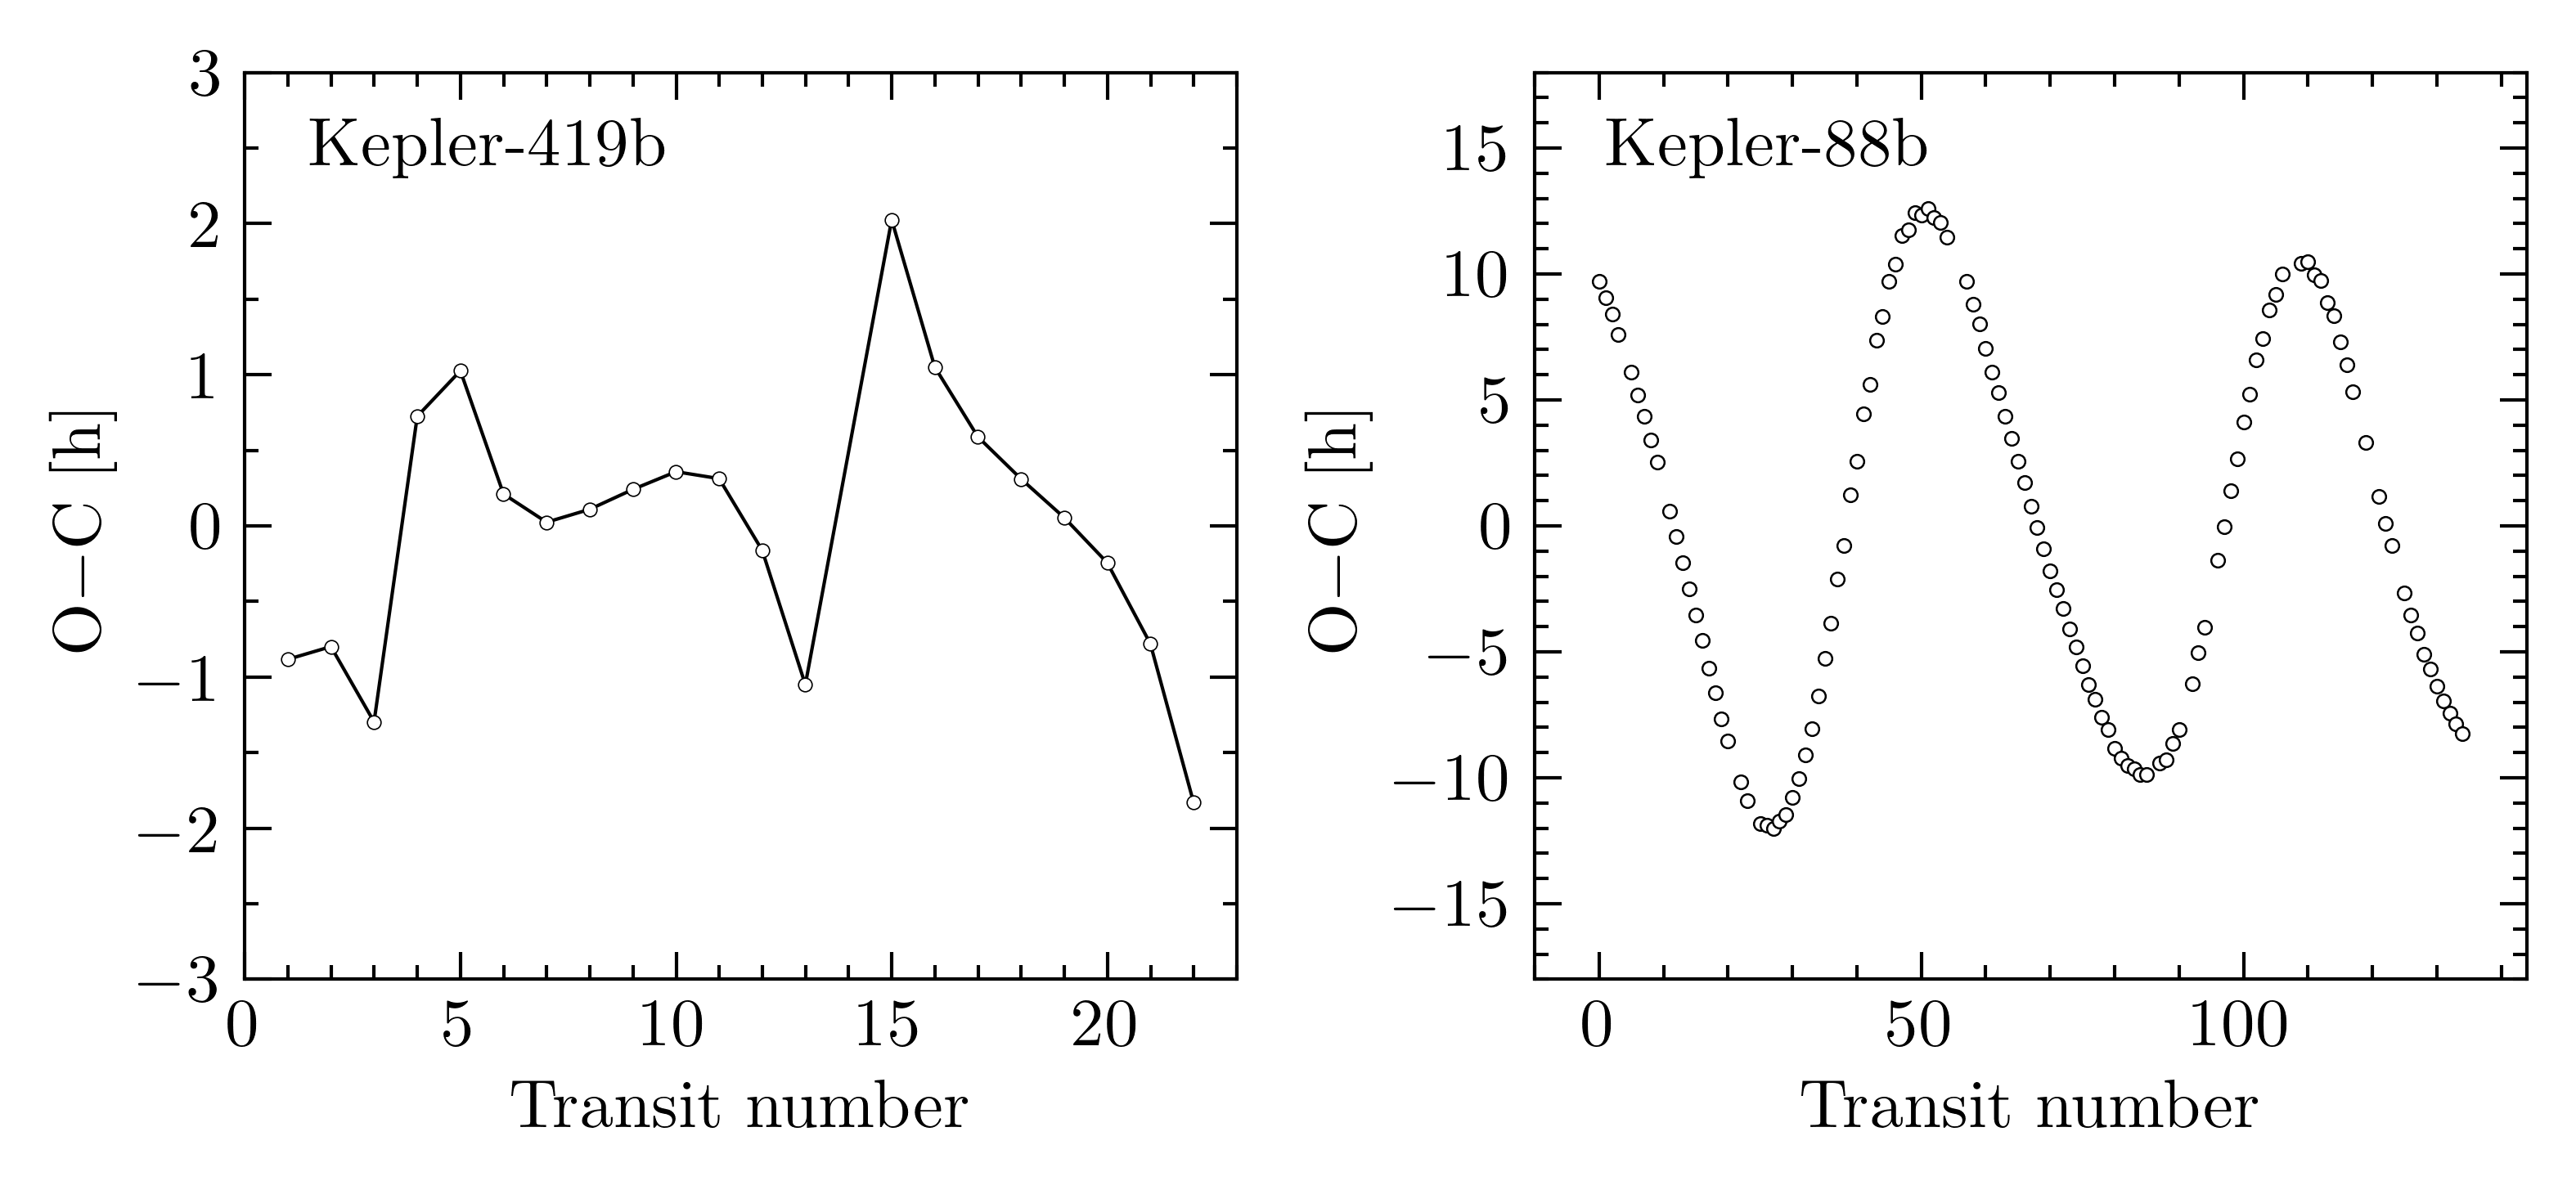

In [10]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0.3, hspace=0.0)

# left panel: Kepler-419b

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax1.set_xlim(ntMin_K419b,ntMax_K419b)
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.set_xlabel(r'Transit number',fontsize=axisFontSize)

ax1.set_ylim(yMin_K419b,yMax_K419b)
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
ax1.set_ylabel(r'O$-$C [h]',fontsize=axisFontSize)

ax1.plot(tNum_K419b,OmC_K419b,'o',mfc='white',mec='black',ms=2,mew=0.2,zorder=10)
ax1.plot(tNum_K419b,OmC_K419b,'-',color='black',lw=0.5,zorder=9)
ax1.text(1.5,2.5,'Kepler-419b',va='center',ha='left',fontsize=axisFontSize)

# right panel: TOI-2202b

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax2.set_xlim(ntMin_K88b,ntMax_K88b)
ax2.xaxis.set_major_locator(MultipleLocator(50))
ax2.xaxis.set_minor_locator(MultipleLocator(10))
ax2.set_xlabel(r'Transit number',fontsize=axisFontSize)

ax2.set_ylim(yMin_K88b,yMax_K88b)
ax2.yaxis.set_major_locator(MultipleLocator(5))
ax2.yaxis.set_minor_locator(MultipleLocator(1))
ax2.set_ylabel(r'O$-$C [h]',fontsize=axisFontSize)

ax2.errorbar(tNum_K88b,OmC_K88b,xerr=None,yerr=err_K88b,fmt='o',ms=2,mfc='white',mec='black',mew=0.3,
            capsize=0.0,elinewidth=0.5,ecolor='black',zorder=10)

ax2.text(1,15,'Kepler-88b',va='center',ha='left',fontsize=axisFontSize)

# make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')